In [1]:
import pickle 
with open("9qubit_data/downstream_model_9_step1.pkl", "rb") as f:
    downstream_model_9_step1 = pickle.load(f)
with open("9qubit_data/erroneous_pattern.pkl", "rb") as f:
    erroneous_pattern = pickle.load(f)

upstream_model = downstream_model_9_step1.upstream_model

In [2]:
upstream_model.device2path_table

defaultdict(dict,
            {(0, -1): {'next-cz,3,6': 0,
              'parallel-ry,3': 1,
              'ry,0': 2,
              'parallel-rx,1': 3,
              'next-cz,0,1': 4,
              'former-cz,0,3': 5,
              'next-cz,0,3': 6,
              'rz,0': 7,
              'parallel-cz,1,2': 8,
              'former-rz,1': 9,
              'former-ry,3': 10,
              'former-cz,0,1': 11,
              'parallel-ry,1': 12,
              'parallel-rz,3': 13,
              'rx,0': 14,
              'next-rx,1': 15,
              'former-rx,1': 16,
              'parallel-rz,1': 17,
              'next-rz,1': 18,
              'parallel-cz,3,6': 19,
              'next-ry,3': 20,
              'parallel-rx,3': 21,
              'next-rx,0': 22,
              'former-rx,0': 23,
              'next-cz,1,4': 24,
              'former-ry,1': 25,
              'former-rx,3': 26,
              'former-cz,3,6': 27,
              'next-rz,3': 28,
              'former-rz,0': 29

In [3]:
erroneous_pattern

defaultdict(list,
            {(0, -1): ['former-cz,1,4', 'parallel-ry,3', 'rz,0'],
             (1, -1): ['next-cz,2,5', 'parallel-rz,0', 'next-rx,4'],
             (2, -1): ['next-rz,2', 'next-ry,5', 'next-cz,0,1'],
             (3, -1): ['former-cz,3,4', 'ry,3', 'parallel-ry,6'],
             (4, -1): ['next-cz,1,4', 'next-rx,7', 'parallel-cz,0,1'],
             (5, -1): ['former-cz,2,5', 'next-rz,8', 'former-rz,4'],
             (6, -1): ['next-cz,4,7', 'next-rz,3', 'parallel-cz,3,4'],
             (7, -1): ['former-ry,6', 'next-cz,4,7', 'former-cz,4,7'],
             (8, -1): ['next-ry,5', 'former-cz,7,8', 'former-cz,2,5'],
             (5, 8): ['next-rz,2', 'former-cz,3,4', 'next-rz,4'],
             (4, 7): ['parallel-cz,3,6', 'former-rz,3', 'next-rz,5'],
             (4, 5): ['former-rz,3', 'former-rx,7', 'parallel-rz,1'],
             (0, 3): ['next-ry,3', 'next-ry,0', 'former-ry,1'],
             (7, 8): ['next-ry,4', 'next-rx,5', 'next-rz,8'],
             (3, 4): ['next-cz,

In [4]:
import numpy as np
error_params = np.array(downstream_model_9_step1.error_params)
error_params.shape

(21, 88)

In [5]:
device_index2device = {}
for device  in upstream_model.device2path_table.keys():
    device_index = list(upstream_model.device2path_table.keys()).index(device)
    device_index2device[device_index] = device
device_index2device

{0: (0, -1),
 1: (1, -1),
 2: (2, -1),
 3: (3, -1),
 4: (4, -1),
 5: (5, -1),
 6: (6, -1),
 7: (7, -1),
 8: (8, -1),
 9: (4, 7),
 10: (3, 6),
 11: (0, 1),
 12: (6, 7),
 13: (2, 5),
 14: (3, 4),
 15: (4, 5),
 16: (7, 8),
 17: (1, 2),
 18: (0, 3),
 19: (1, 4),
 20: (5, 8)}

In [6]:
error_params_path_weight = {}
error_params_path = {}
for idx, device_error_param in enumerate(error_params):
    device = device_index2device[idx]
    sort = np.argsort(device_error_param)
    sort = sort[::-1]
    device_error_params_path_weight = []
    device_error_params_path = []
    for i in sort:
        if int(i) in upstream_model.device2reverse_path_table[device].keys():
            path = upstream_model.device2reverse_path_table[device][int(i)]
            if isinstance(path,str):
                device_error_params_path_weight.append((path,device_error_param[i]))
                device_error_params_path.append(path)
    error_params_path_weight[device] = device_error_params_path_weight
    error_params_path[device] = device_error_params_path

error_params_path_weight

{(0, -1): [('former-ry,3', 8.278765),
  ('parallel-ry,3', 8.195725),
  ('rz,0', 8.061804),
  ('former-cz,0,3', 7.7378974),
  ('former-cz,1,4', 7.7250466),
  ('former-cz,3,6', 7.7032995),
  ('next-ry,3', 7.4704185),
  ('next-rz,0', 7.2845845),
  ('former-rz,0', 7.2827163),
  ('former-cz,1,2', 6.687273),
  ('next-cz,0,3', 6.140116),
  ('parallel-rx,1', 6.007963),
  ('next-cz,0,1', 5.983422),
  ('next-cz,3,6', 5.9356747),
  ('parallel-cz,3,4', 5.594239),
  ('former-cz,0,1', 5.559744),
  ('next-cz,1,2', 5.4014506),
  ('parallel-cz,3,6', 5.3414836),
  ('parallel-rx,3', 5.013085),
  ('former-rx,1', 4.9932184),
  ('next-cz,1,4', 4.9801235),
  ('ry,0', 4.851281),
  ('next-ry,0', 4.7804966),
  ('former-ry,0', 4.78029),
  ('parallel-cz,1,4', 4.653212),
  ('parallel-cz,1,2', 4.5151954),
  ('former-cz,3,4', 4.252073),
  ('parallel-rz,1', 4.09408),
  ('next-cz,3,4', 4.0430994),
  ('next-rx,3', 3.8897493),
  ('next-rx,0', 3.4756663),
  ('former-rx,0', 3.4754698),
  ('former-rx,3', 3.2614677),
  ('ne

In [7]:
erroneous_pattern_weight = {}
for device, patterns in erroneous_pattern.items():
    device_error_params_path = error_params_path[device]
    device_erroneous_pattern_weight = []
    for pattern in patterns:
        if pattern in device_error_params_path:
            k = device_error_params_path.index(pattern)
            device_erroneous_pattern_weight.append((patterns,k))
    erroneous_pattern_weight[device] = device_erroneous_pattern_weight
erroneous_pattern_weight

{(0, -1): [(['former-cz,1,4', 'parallel-ry,3', 'rz,0'], 4),
  (['former-cz,1,4', 'parallel-ry,3', 'rz,0'], 1),
  (['former-cz,1,4', 'parallel-ry,3', 'rz,0'], 2)],
 (1, -1): [(['next-cz,2,5', 'parallel-rz,0', 'next-rx,4'], 4),
  (['next-cz,2,5', 'parallel-rz,0', 'next-rx,4'], 2),
  (['next-cz,2,5', 'parallel-rz,0', 'next-rx,4'], 15)],
 (2, -1): [(['next-rz,2', 'next-ry,5', 'next-cz,0,1'], 4),
  (['next-rz,2', 'next-ry,5', 'next-cz,0,1'], 14),
  (['next-rz,2', 'next-ry,5', 'next-cz,0,1'], 2)],
 (3, -1): [(['former-cz,3,4', 'ry,3', 'parallel-ry,6'], 2),
  (['former-cz,3,4', 'ry,3', 'parallel-ry,6'], 1),
  (['former-cz,3,4', 'ry,3', 'parallel-ry,6'], 16)],
 (4, -1): [(['next-cz,1,4', 'next-rx,7', 'parallel-cz,0,1'], 3),
  (['next-cz,1,4', 'next-rx,7', 'parallel-cz,0,1'], 8),
  (['next-cz,1,4', 'next-rx,7', 'parallel-cz,0,1'], 0)],
 (5, -1): [(['former-cz,2,5', 'next-rz,8', 'former-rz,4'], 0),
  (['former-cz,2,5', 'next-rz,8', 'former-rz,4'], 11),
  (['former-cz,2,5', 'next-rz,8', 'former-r

In [8]:
x ,y = [],[]
for top in range(1,100,1):
    top /= 100
    total_find = 0
    for device, pattern_weights in erroneous_pattern_weight.items():
        path_table_size = len(upstream_model.device2path_table[device].keys())
        for pattern_weight in pattern_weights:
            if  pattern_weight[1] < top * path_table_size:
                total_find += 1

    find_ratio = total_find / 63
    print(top,find_ratio)
    x.append(top)
    y.append(find_ratio)

0.01 0.20634920634920634
0.02 0.3333333333333333
0.03 0.3968253968253968
0.04 0.5238095238095238
0.05 0.6031746031746031
0.06 0.6190476190476191
0.07 0.6666666666666666
0.08 0.7301587301587301
0.09 0.7301587301587301
0.1 0.7777777777777778
0.11 0.8095238095238095
0.12 0.8253968253968254
0.13 0.8253968253968254
0.14 0.8412698412698413
0.15 0.8571428571428571
0.16 0.8571428571428571
0.17 0.8571428571428571
0.18 0.8571428571428571
0.19 0.8571428571428571
0.2 0.873015873015873
0.21 0.873015873015873
0.22 0.8888888888888888
0.23 0.8888888888888888
0.24 0.8888888888888888
0.25 0.8888888888888888
0.26 0.8888888888888888
0.27 0.9047619047619048
0.28 0.9047619047619048
0.29 0.9206349206349206
0.3 0.9206349206349206
0.31 0.9206349206349206
0.32 0.9206349206349206
0.33 0.9365079365079365
0.34 0.9365079365079365
0.35 0.9523809523809523
0.36 0.9523809523809523
0.37 0.9682539682539683
0.38 0.9682539682539683
0.39 0.9682539682539683
0.4 0.9682539682539683
0.41 0.9682539682539683
0.42 0.96825396825396

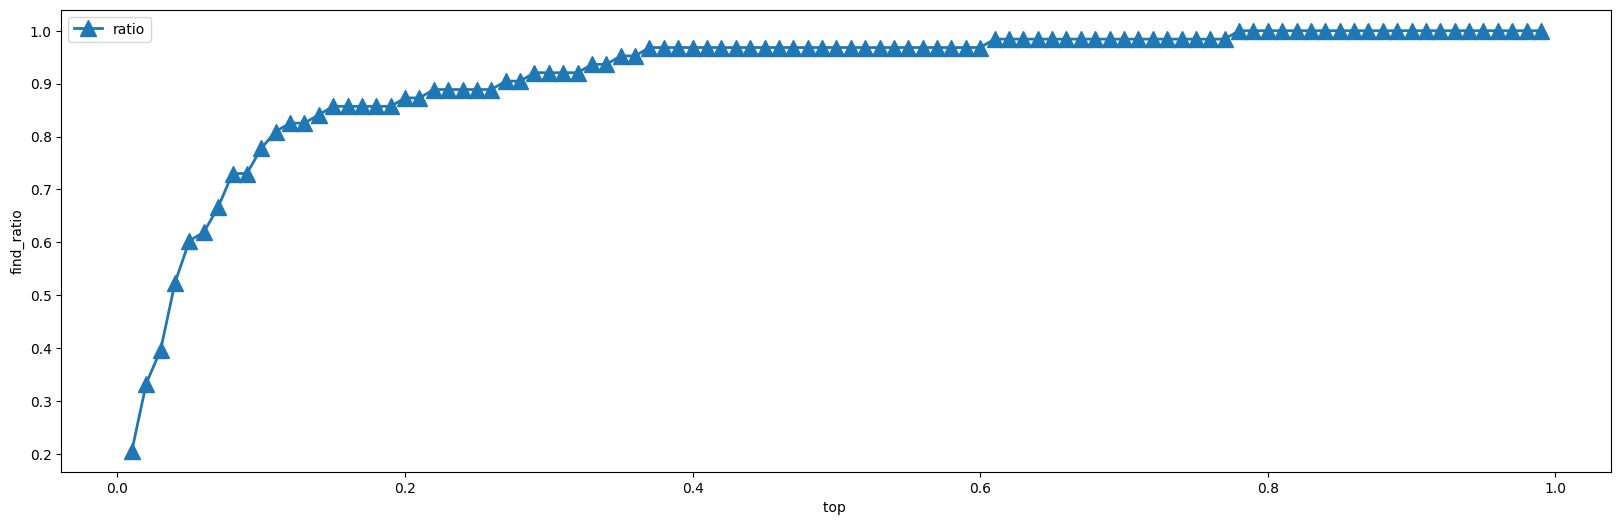

: 

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,6)) # 创建一个图形对象和一个子图对象
axes.plot(x, y ,markersize = 12,linewidth = 2, label='ratio',marker = '^' )
axes.set_xlabel('top ')
axes.set_ylabel('find_ratio')
axes.legend() # 添加图例
fig.show()
fig.savefig("find_ratio.svg")

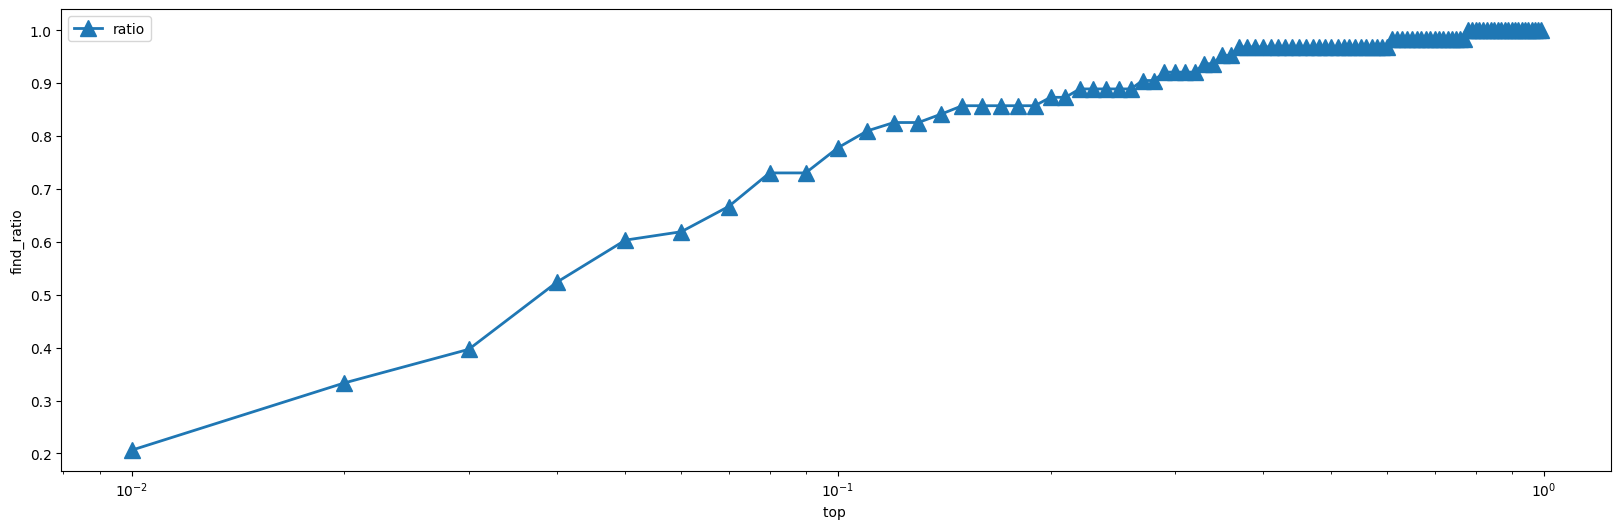

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20,6)) # 创建一个图形对象和一个子图对象
axes.plot(x, y ,markersize = 12,linewidth = 2, label='ratio',marker = '^' )
axes.set_xlabel('top ')
axes.set_ylabel('find_ratio')
axes.set_xscale("log")
axes.legend() # 添加图例
fig.show()